In [1]:
import numpy as np
import sklearn
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime

In [2]:
a = np.linspace(-3,3,100)
a2 = np.linspace(0.1,3,100)

In [3]:
b = -np.log (1/(1+ np.exp(-a)))
c = -np.log(1- (1/(1+ np.exp(-a))))
d = -np.log(a2)

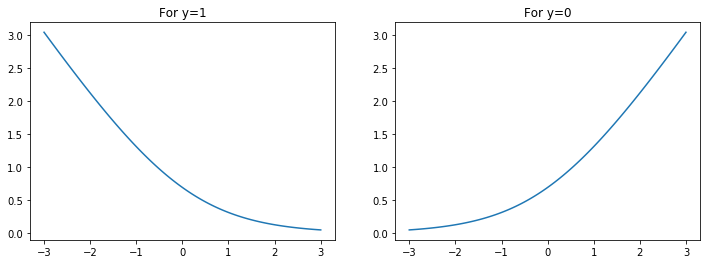

In [4]:
plt.figure(0, figsize=(12,4))
plt.subplot(121)
plt.title('For y=1')
plt.plot(a,b)
plt.subplot(122)
#plt.ylim(0,)
#plt.xlim(0,1.5)
plt.title('For y=0')
#plt.plot(a2,d)
plt.plot(a,c)
plt.show()

In [2]:
ds = pd.read_csv('/home/rupalibhati/CB-Perceptron/Class_7/train.csv')
print ds.shape

(42000, 785)


In [4]:
data = ds.values

In [5]:
X = np.zeros((2000, 784))
y = np.zeros((X.shape[0]))

for ix in range(X.shape[0]):
    if data[ix, 0]%2 == 0:
        X[ix, :] = data[ix, 1:]
        y[ix] = 0
    else:
        X[ix, :] = data[ix, 1:]
        y[ix] = 1

In [6]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(1600, 784) (400, 784)
(1600,) (400,)


In [9]:
start = datetime.datetime.now()
cf1 = svm.SVC(kernel='linear')

cf1.fit(X_train, y_train)

print cf1.score(X_train, y_train)
print cf1.score(X_test, y_test)
print datetime.datetime.now() - start

1.0
0.775
0:00:04.146688


In [10]:
svm.SVC?

In [11]:
cf1 = svm.SVC(kernel='poly', random_state=21, degree=3)

cf1.fit(X_train, y_train)

print cf1.score(X_train, y_train)
print cf1.score(X_test, y_test)

1.0
0.9425


In [12]:
cf1 = svm.SVC(kernel='rbf')

cf1.fit(X_train, y_train)

print cf1.score(X_train, y_train)
print cf1.score(X_test, y_test)

1.0
0.4975


In [7]:
import keras
from keras.layers import Input, Dense, Conv2D, Flatten, Activation, MaxPooling2D
from keras.utils import np_utils
from keras.models import Model, Sequential

Using TensorFlow backend.


In [8]:
X_ = X.reshape((X.shape[0], 28, 28, 1))
X_tr = X_[:split]
X_te = X_[split:]

Y = np_utils.to_categorical(y)
Y_train = Y[:split]
Y_test = Y[split:]

print X_tr.shape, X_te.shape
print Y_train.shape, Y_test.shape

(1600, 28, 28, 1) (400, 28, 28, 1)
(1600, 2) (400, 2)


In [8]:
Conv2D?

In [9]:

inp = Input(shape=(28, 28, 1))
#inp = Input(shape=(1600,28, 28, 1))

c1 = Conv2D(32, 3,3, activation='relu')(inp)
c2 = Conv2D(16, 3,3, activation='relu')(c1)

mp1 = MaxPooling2D(pool_size=(2, 2))(c2)

c3 = Conv2D(8, 5,5, activation='relu')(mp1)
f1 = Flatten()(c3)

fc1 = Dense(64, activation='relu')(f1)
fc2 = Dense(2, activation='softmax')(fc1)

model = Model(input=inp, output=fc2)
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 26, 26, 32)    320         input_1[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 24, 24, 16)    4624        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 16)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [10]:
feature_selector = Model(input=inp, output=fc1)

In [11]:
hist = model.fit(X_tr, Y_train,
        nb_epoch=9,
         shuffle=True,
         batch_size=32,
         verbose=2,
         validation_data=(X_te, Y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/9
3s - loss: 1.3998 - acc: 0.7650 - val_loss: 0.5714 - val_acc: 0.7900
Epoch 2/9
3s - loss: 0.2346 - acc: 0.9000 - val_loss: 0.3478 - val_acc: 0.8850
Epoch 3/9
3s - loss: 0.1134 - acc: 0.9581 - val_loss: 0.2916 - val_acc: 0.9150
Epoch 4/9
3s - loss: 0.0491 - acc: 0.9844 - val_loss: 0.2689 - val_acc: 0.9100
Epoch 5/9
3s - loss: 0.0323 - acc: 0.9894 - val_loss: 0.3149 - val_acc: 0.9200
Epoch 6/9
3s - loss: 0.0153 - acc: 0.9956 - val_loss: 0.2320 - val_acc: 0.9350
Epoch 7/9
3s - loss: 0.0087 - acc: 0.9988 - val_loss: 0.2767 - val_acc: 0.9300
Epoch 8/9
3s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.2474 - val_acc: 0.9400
Epoch 9/9
3s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.2545 - val_acc: 0.9375


In [12]:
data_new = feature_selector.predict(X_)

In [13]:
print data_new.shape

(2000, 64)


In [14]:
split = int(0.8 * data_new.shape[0])

X_train = data_new[:split]
X_test = data_new[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(1600, 64) (400, 64)
(1600,) (400,)


In [15]:
start = datetime.datetime.now()
cf1 = svm.SVC(kernel='rbf')

cf1.fit(X_train, y_train)

print cf1.score(X_train, y_train)
print cf1.score(X_test, y_test)
print datetime.datetime.now() - start

1.0
0.6475
0:00:01.119782


In [21]:
#cf1 = svm.SVC(kernel='poly', random_state=21, degree=1)
cf1 = svm.SVC(kernel='linear')

cf1.fit(X_train, y_train)

print cf1.score(X_train, y_train)
print cf1.score(X_test, y_test)

1.0
0.9325
